In [15]:
import folium
import pandas as pd
from folium.plugins import TimestampedGeoJson
from shapely.geometry import Point
import numpy as np

from branca.colormap import linear




In [24]:
# Charger les données à partir du fichier CSV
file_path = 'test2.csv'  # Remplacez par le chemin du fichier
data = pd.read_csv(file_path, parse_dates=['timestamp'])
df = pd.DataFrame(data)

In [25]:
print(data.head())  # Voir les premières lignes du dataset
print(data.describe())  # Statistiques descriptives pour détecter les anomalies
print(data['taux_dispo_closest_1'].value_counts())  # Fréquences des valeurs spécifiques


   Unnamed: 0                 timestamp  center_lat  center_lon  \
0           0 2020-01-22 00:00:00+00:00     48.8175      2.3325   
1           1 2020-01-22 00:00:00+00:00     48.8175      2.3375   
2           2 2020-01-22 00:00:00+00:00     48.8175      2.3425   
3           3 2020-01-22 00:00:00+00:00     48.8175      2.3475   
4           4 2020-01-22 00:00:00+00:00     48.8175      2.3575   

   distance_to_closest_1  taux_dispo_closest_1  distance_to_closest_2  \
0               0.008150              0.333333               0.009885   
1               0.006918              0.333333               0.006950   
2               0.003534              0.333333               0.006219   
3               0.005122              0.333333               0.007515   
4               0.011732              0.833333               0.013002   

   taux_dispo_closest_2  distance_to_closest_3  taux_dispo_closest_3  \
0              0.333333               0.011294              0.444444   
1             

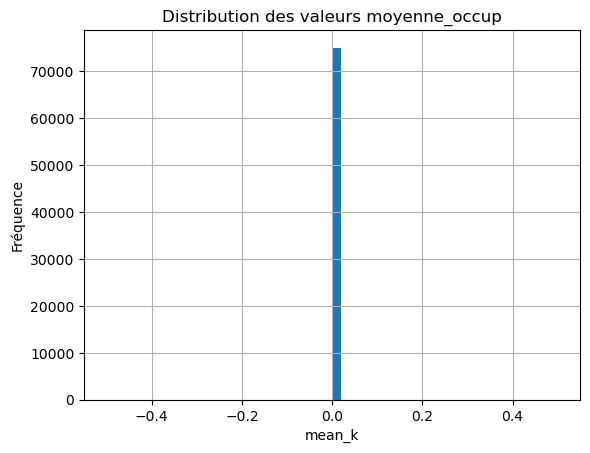

In [26]:
import matplotlib.pyplot as plt

data['mean_k'].hist(bins=50)
plt.title("Distribution des valeurs moyenne_occup")
plt.xlabel("mean_k")
plt.ylabel("Fréquence")
plt.show()


In [20]:
# Préparer les coins des carrés à partir des centres
square_size = 0.005  # Taille des carrés (latitude/longitude)
data['lat_min'] = data['center_lat'] - square_size / 2
data['lat_max'] = data['center_lat'] + square_size / 2
data['lon_min'] = data['center_lon'] - square_size / 2
data['lon_max'] = data['center_lon'] + square_size / 2


In [21]:


def draw(var):

    # Préparer la colormap
    cmap = linear.PuRd_09.scale(data[var].min(), data[var].max())

    # Initialiser la carte centrée sur Paris
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

    # Préparer le GeoJSON pour animer les carrés
    geojson_data = []

    for _, row in data.iterrows():
        # Définir la couleur du carré en fonction de 'moyenne_k'
        color = cmap(row[var])

        # Ajouter le carré à la liste GeoJSON
        geojson_data.append({
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [row['lon_min'], row['lat_min']],
                    [row['lon_min'], row['lat_max']],
                    [row['lon_max'], row['lat_max']],
                    [row['lon_max'], row['lat_min']],
                    [row['lon_min'], row['lat_min']]  # Fermer le polygone
                ]]
            },
            "properties": {
                "time": row['timestamp'].isoformat(),
                "style": {
                    "color": "",
                    "fillColor": color,
                    "fillOpacity": 0.4,
                },
                "popup": (f"Heure: {row['timestamp']}<br>"
                        f"Moyenne Occup: {row[var]:.2f}<br>")
            }
        })


        

    # Ajouter l'animation des carrés sur la carte
    TimestampedGeoJson(
        {"type": "FeatureCollection", "features": geojson_data},
        period='PT1H',  # Intervalle entre les changements (1 heure)
        duration="PT1H",  # Durée d'affichage de chaque état
        auto_play=True,   # Lancer automatiquement
        loop=False,       # Ne pas boucler
        add_last_point=True
    ).add_to(m)

    # Afficher la carte
    return m


In [27]:
#draw('distance_to_station')


In [28]:
#draw('taux_dispo_closest')

In [29]:
#draw('mean_k')